In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


In [48]:
df=pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [49]:
print(df.isnull().sum())


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [51]:
df["time"] = df["time"].str.replace("PM", "").str.replace("AM", "").astype(int) + \
             df["time"].str.contains("PM").astype(int) * 12

In [52]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [53]:
df=df.drop_duplicates()
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,14,Restaurant(<20),1d,0,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10,Coffee House,2h,0,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10,Carry out & Take away,2h,0,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,2h,0,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,1d,0,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,18,Carry out & Take away,1d,1,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7,Carry out & Take away,1d,1,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7,Coffee House,1d,1,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7,Bar,1d,1,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


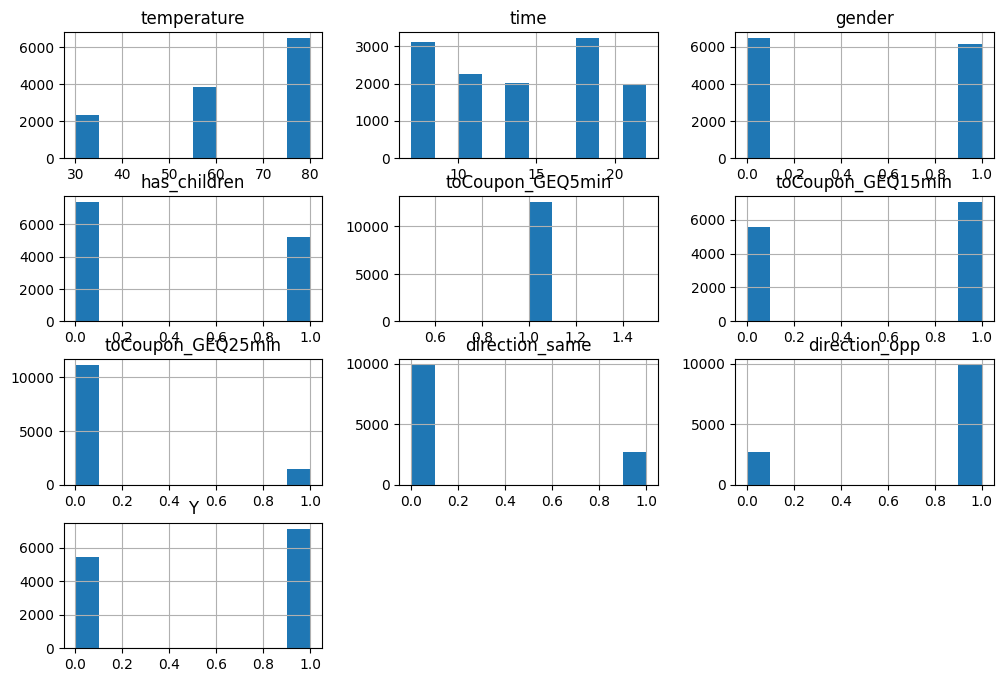

In [54]:
df.hist(figsize=(12, 8))
plt.show()

In [55]:
df.drop(columns=['car'], inplace=True)

<ipython-input-55-0ba5ad432538>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['car'], inplace=True)


In [56]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [57]:
X = df.drop(columns=['Y'])
y = df['Y']

In [58]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
#median
median_imputer = SimpleImputer(strategy='median')
X_train_median = median_imputer.fit_transform(X_train)
X_test_median = median_imputer.transform(X_test)


In [60]:
#KNN
knn_imputer = KNNImputer(n_neighbors=5)
X_train_knn = knn_imputer.fit_transform(X_train)
X_test_knn = knn_imputer.transform(X_test)


In [61]:

rf_model_median = RandomForestClassifier(random_state=42)
rf_model_median.fit(X_train_median, y_train)

rf_model_knn = RandomForestClassifier(random_state=42)
rf_model_knn.fit(X_train_knn, y_train)


RandomForestClassifier(random_state=42)

In [62]:
# Predictions
y_pred_median = rf_model_median.predict(X_test_median)
y_pred_knn = rf_model_knn.predict(X_test_knn)

# Compare accuracy
print("Median Imputation Accuracy:", accuracy_score(y_test, y_pred_median))
print("KNN Imputation Accuracy:", accuracy_score(y_test, y_pred_knn))

# Detailed classification reports
print("\nMedian Imputation Classification Report:")
print(classification_report(y_test, y_pred_median))

print("\nKNN Imputation Classification Report:")
print(classification_report(y_test, y_pred_knn))


Median Imputation Accuracy: 0.7402443831296808
KNN Imputation Accuracy: 0.7402443831296808

Median Imputation Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.68      1128
           1       0.74      0.83      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537


KNN Imputation Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.68      1128
           1       0.74      0.83      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537



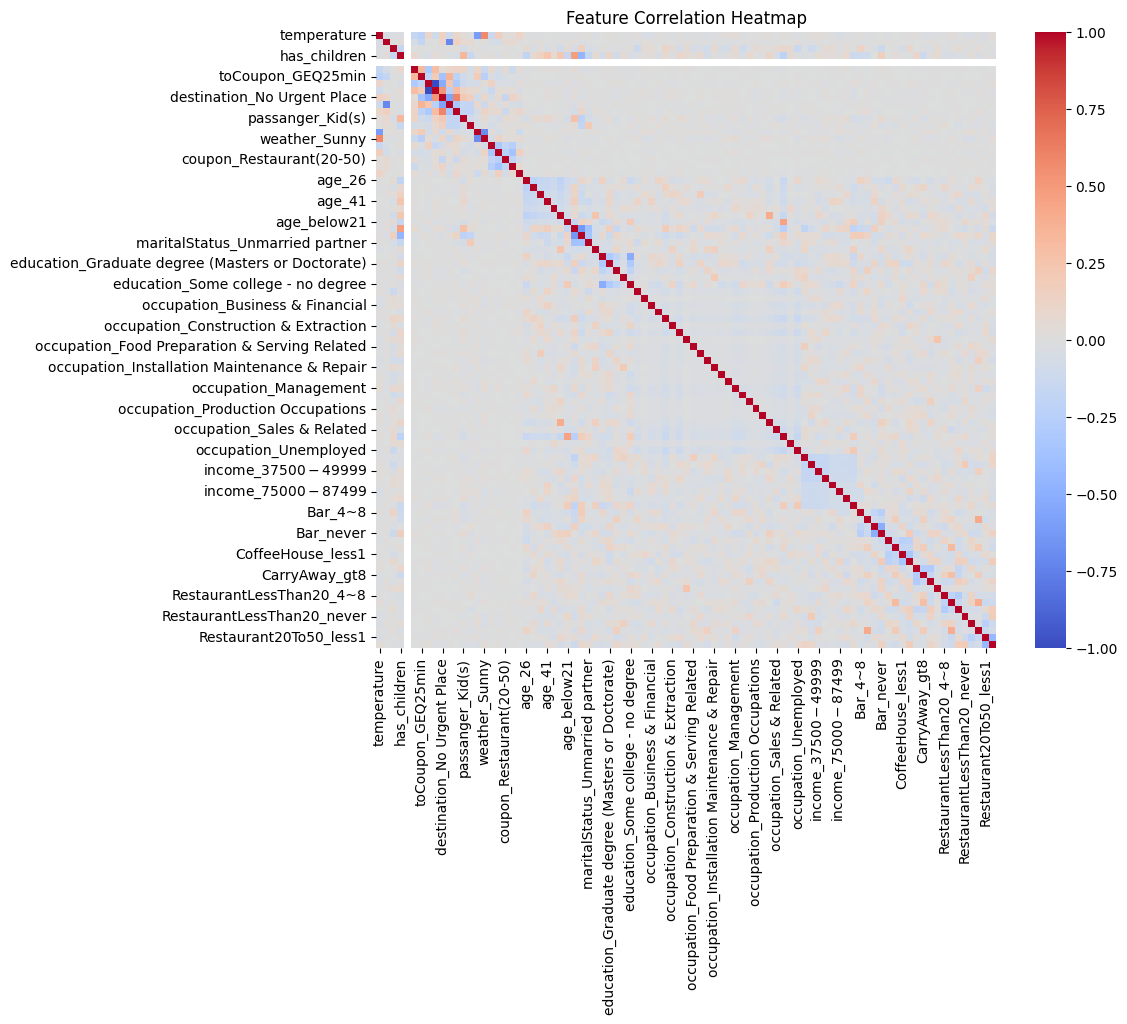

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [64]:
imputer = SimpleImputer(strategy="median")
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = imputer.fit_transform(df[num_cols])

<ipython-input-64-4f361086fdf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = imputer.fit_transform(df[num_cols])


In [65]:
for col in [ 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-65-eb1805c2c073>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-65-eb1805c2c073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12610 non-null  object 
 1   passanger             12610 non-null  object 
 2   weather               12610 non-null  object 
 3   temperature           12610 non-null  float64
 4   time                  12610 non-null  float64
 5   coupon                12610 non-null  object 
 6   expiration            12610 non-null  object 
 7   gender                12610 non-null  float64
 8   age                   12610 non-null  object 
 9   maritalStatus         12610 non-null  object 
 10  has_children          12610 non-null  float64
 11  education             12610 non-null  object 
 12  occupation            12610 non-null  object 
 13  income                12610 non-null  object 
 14  Bar                   12610 non-null  object 
 15  CoffeeHouse           12

In [67]:
df.to_csv("cleaned_dataset.csv", index=False)
from google.colab import files
files.download("cleaned_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>